In [1]:
!git clone https://github.com/CatEatSad/data.git

Cloning into 'data'...
remote: Enumerating objects: 8656, done.
remote: Total 8656 (delta 0), reused 0 (delta 0), pack-reused 8656
Receiving objects: 100% (8656/8656), 857.85 MiB | 27.14 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Updating files: 100% (10112/10112), done.


In [2]:
%ls
!pip install tensorflow


data/  sample_data/


In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import glob

In [4]:

#gán địa chỉ của file để load
train_image_file_path = "/content/data/data_new_1/images/train"
train_image_labels_path = "/content/data/data_new_1/labels/train"
valid_image_file_path = "/content/data/data_new_1/images/val"
valid_image_labels_path = "/content/data/data_new_1/labels/val"

In [5]:
#Hàm để lấy địa chỉ
def load_data_training(directory):
  list_data = glob.glob(directory + "/*")
  return list_data

In [6]:
#địa chỉ của ảnh để train được lưu vào
image_data_train = load_data_training(train_image_file_path)
image_data_train.sort()

#địa chỉ của nhãn dán để train đc lưu vào
labels_data_train = load_data_training(train_image_labels_path)
labels_data_train.sort()

#địa chỉ của ảnh để valid được lưu vào
image_data_valid = load_data_training(valid_image_file_path)
image_data_valid.sort()

#địa chỉ của nhãn dán để valid đc lưu vào
labels_data_valid = load_data_training(valid_image_labels_path)
labels_data_valid.sort()

In [7]:
print(image_data_train[0])
print(labels_data_train[0])
print(image_data_valid[0])
print(labels_data_valid[0])

/content/data/data_new_1/images/train/Dieu_0001.png
/content/data/data_new_1/labels/train/Dieu_0001.txt
/content/data/data_new_1/images/val/Dieu_0003.png
/content/data/data_new_1/labels/val/Dieu_0003.txt


In [8]:
#Phần này là phần load ảnh , data ở các vị trí của biển số
data_for_train = [] # list để load ảnh để train
targets_for_train=[] # list để load bounding của ảnh để train
filenames_for_train=[] # load file name của ảnh để train


data_for_valid = [] # list để load ảnh để valid
targets_for_valid = [] # list để load bounding của ảnh để valid
filenames_for_valid = [] # load file name của ảnh để valid

def get_file_name(path):
  return path.split('/')[-1].split('.')[0]

def get_bounding_scale(path):
  f = open(path, "r")
  labels, x1, y1, x2, y2, x3, y3, x4, y4 = f.read().split()
  minX = float(min([x1, x2, x3, x4]))
  minY = float(min([y1, y2, y3, y4]))
  maxX = float(max([x1, x2, x3, x4]))
  maxY = float(max([y1, y2, y3, y4]))
  return (minX, minY, maxX, maxY)




In [9]:
for i in image_data_train:
  image = load_img(i, target_size=(224,224))
  image = img_to_array(image)
  data_for_train.append(image)
  filenames_for_train.append(get_file_name(i))



In [10]:
for i in image_data_valid:
  image = load_img(i, target_size=(224,224))
  image = img_to_array(image)
  data_for_valid.append(image)
  filenames_for_valid.append(get_file_name(i))

In [11]:
print(filenames_for_train[0])
print(filenames_for_valid[0])


Dieu_0001
Dieu_0003


In [12]:
for j in labels_data_train:
    print(j)
    targets_for_train.append(get_bounding_scale(j))

/content/data/data_new_1/labels/train/Dieu_0001.txt
/content/data/data_new_1/labels/train/Dieu_0002.txt
/content/data/data_new_1/labels/train/Dieu_0006.txt
/content/data/data_new_1/labels/train/Dieu_0008.txt
/content/data/data_new_1/labels/train/Dieu_0011.txt
/content/data/data_new_1/labels/train/Dieu_0012.txt
/content/data/data_new_1/labels/train/Dieu_0013.txt
/content/data/data_new_1/labels/train/Dieu_0014.txt
/content/data/data_new_1/labels/train/Dieu_0015.txt
/content/data/data_new_1/labels/train/Dieu_0016.txt
/content/data/data_new_1/labels/train/Dieu_0019.txt
/content/data/data_new_1/labels/train/Dieu_0021.txt
/content/data/data_new_1/labels/train/Dieu_0022.txt
/content/data/data_new_1/labels/train/Dieu_0023.txt
/content/data/data_new_1/labels/train/Dieu_0025.txt
/content/data/data_new_1/labels/train/Dieu_0026.txt
/content/data/data_new_1/labels/train/Dieu_0027.txt
/content/data/data_new_1/labels/train/Dieu_0028.txt
/content/data/data_new_1/labels/train/Dieu_0029.txt
/content/dat

In [13]:
for j in labels_data_valid:
    print(j)
    targets_for_valid.append(get_bounding_scale(j))

/content/data/data_new_1/labels/val/Dieu_0003.txt
/content/data/data_new_1/labels/val/Dieu_0017.txt
/content/data/data_new_1/labels/val/Dieu_0035.txt
/content/data/data_new_1/labels/val/Dieu_0037.txt
/content/data/data_new_1/labels/val/Dieu_0047.txt
/content/data/data_new_1/labels/val/Dieu_0058.txt
/content/data/data_new_1/labels/val/Dieu_0063.txt
/content/data/data_new_1/labels/val/Dieu_0067.txt
/content/data/data_new_1/labels/val/Dieu_0101.txt
/content/data/data_new_1/labels/val/Dieu_0106.txt
/content/data/data_new_1/labels/val/Dieu_0108.txt
/content/data/data_new_1/labels/val/Dieu_0110.txt
/content/data/data_new_1/labels/val/Dieu_0128.txt
/content/data/data_new_1/labels/val/Dieu_0140.txt
/content/data/data_new_1/labels/val/Dieu_0156.txt
/content/data/data_new_1/labels/val/Dieu_0164.txt
/content/data/data_new_1/labels/val/Dieu_0181.txt
/content/data/data_new_1/labels/val/Dieu_0183.txt
/content/data/data_new_1/labels/val/Dieu_0188.txt
/content/data/data_new_1/labels/val/Dieu_0189.txt


In [15]:
print(len(targets_for_train))
print(len(targets_for_valid))
print(targets_for_train[0])
print(targets_for_valid[0])

3105
1016
(0.3730842911877395, 0.43373601447613225, 0.5330459770114941, 0.59557305604404)
(0.18821839080459773, 0.648148148148148, 0.364463601532567, 0.7720306513409961)


In [16]:
# đổi data sang dạng numpy array
data_for_train = np.array(data_for_train, dtype="float32") / 255.0
targets_for_train = np.array(targets_for_train, dtype="float32")

data_for_valid = np.array(data_for_valid, dtype="float32") / 255.0
targets_for_valid = np.array(targets_for_valid, dtype="float32")

In [18]:
# tách data ra làm 2 phần 90% và 10% , 90 để train còn 10 để test
print(targets_for_train)
print(targets_for_valid)
# split = train_test_split(data,targets,filenames, test_size=0.10, random_state = 42)

[[0.37308428 0.43373603 0.53304595 0.59557307]
 [0.4152299  0.44891444 0.55699235 0.59578544]
 [0.33290926 0.7913486  0.46692112 0.84351146]
 ...
 [0.4126621  0.20302568 0.5980168  0.41253495]
 [0.32036614 0.45525044 0.5156369  0.6952708 ]
 [0.5156369  0.38710907 0.7826087  0.64848715]]
[[0.18821838 0.6481481  0.3644636  0.77203065]
 [0.62404215 0.45657727 0.7801724  0.57279694]
 [0.34817642 0.73282444 0.47201017 0.7773537 ]
 ...
 [0.5041953  0.19387236 0.7048055  0.4216883 ]
 [0.3089245  0.17251462 0.52105266 0.42105263]
 [0.36460716 0.50711924 0.5881007  0.75832695]]


In [ ]:
#  unpack the data split
# (trainImages, testImages) = split[:2]
# (trainTargets, testTargets) = split[2:4]
# (trainFilenames, testFilenames) = split[4:]

In [19]:
print("Length of trainImages:", len(targets_for_train))
print("Length of trainTargets:", len(targets_for_valid))

Length of trainImages: 3105
Length of trainTargets: 1016


In [20]:
#lưu lại tên những file test để có thể sử dụng cho các lần sau
print("[INFO] saving testing filenames...")
f = open("filefortest.txt", "w")
f.write("\n".join(filenames_for_valid))
f.close()

[INFO] saving testing filenames...


In [21]:
vgg = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))


58889256/58889256 [==============================] - 0s 0us/step


In [22]:
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add( Dense(128, activation="relu"))
model.add( Dense(64, activation="relu"))
model.add( Dense(32, activation="relu"))
model.add( Dense(4, activation="sigmoid"))

In [23]:
vgg.trainable = False

In [24]:
opt = Adam(1e-4)
model.compile(loss = "mse", optimizer= opt, metrics = ["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 17936548 (68.42 MB)
Trainable params: 3221

In [25]:

print("[INFO] training bounding box regressor...")
H = model.fit(
	data_for_train, targets_for_train,
	validation_data=(data_for_valid, targets_for_valid),
	batch_size=32,
	epochs=50,
	verbose=1)

[INFO] training bounding box regressor...
Epoch 1/50
98/98 [==============================] - 34s 233ms/step - loss: 0.0081 - accuracy: 0.7965 - val_loss: 0.0048 - val_accuracy: 0.8937
Epoch 2/50
98/98 [==============================] - 18s 179ms/step - loss: 0.0028 - accuracy: 0.9056 - val_loss: 0.0041 - val_accuracy: 0.9026
Epoch 3/50
98/98 [==============================] - 17s 171ms/step - loss: 0.0018 - accuracy: 0.9230 - val_loss: 0.0032 - val_accuracy: 0.9213
Epoch 4/50
98/98 [==============================] - 18s 185ms/step - loss: 0.0012 - accuracy: 0.9330 - val_loss: 0.0027 - val_accuracy: 0.9232
Epoch 5/50
98/98 [==============================] - 18s 184ms/step - loss: 8.5626e-04 - accuracy: 0.9459 - val_loss: 0.0029 - val_accuracy: 0.8937
Epoch 6/50
98/98 [==============================] - 19s 191ms/step - loss: 7.1972e-04 - accuracy: 0.9452 - val_loss: 0.0023 - val_accuracy: 0.9281
Epoch 7/50
98/98 [==============================] - 18s 187ms/step - loss: 4.9370e-04 - accu

In [26]:
# serialize the model to disk
print("[INFO] saving object detector model...")
model.save("license_plate_detector.h5", save_format="h5")

[INFO] saving object detector model...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


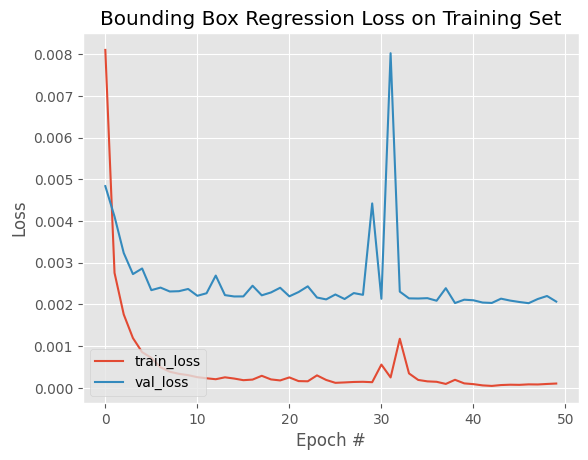

In [27]:
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Bounding Box Regression Loss on Training Set")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("PLOT_PATH")

In [28]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
import numpy as np
import mimetypes
import argparse
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
def inference(imagePath):
    # load the input image (in Keras format) from disk and preprocess
    # it, scaling the pixel intensities to the range [0, 1]
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    # make bounding box predictions on the input image
    preds = model.predict(image)[0]
    return preds

In [30]:
def draw_bbox(img, preds):
    image = np.copy(img)
    (startX, startY, endX, endY) = preds
    (h, w) = image.shape[:2]

    # scale the predicted bounding box coordinates based on the image
    # dimensions
    startX = int(startX * w)
    startY = int(startY * h)
    endX = int(endX * w)
    endY = int(endY * h)

    # draw the predicted bounding box on the image
    cv2.rectangle(image, (startX, startY), (endX, endY),(0, 255, 0), 2)
    return image

1/1 [==============================] - 0s 57ms/step


[0.56161344 0.73658085 0.8083022  0.84654874]


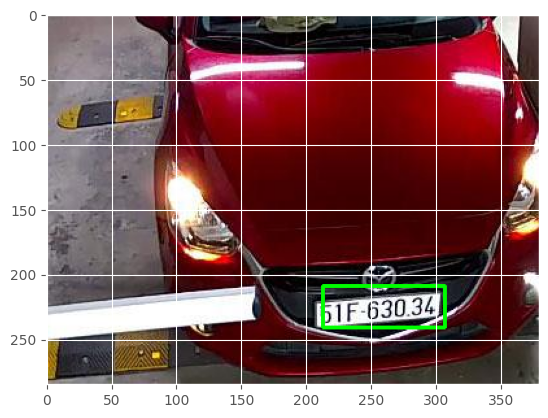

In [39]:
imagePath = '/content/carlong_0156.png'
image = plt.imread(imagePath)
preds = inference(imagePath)
image_with_bbox = draw_bbox(image, preds)
print(preds)
# show the output image
plt.imshow(image_with_bbox)